# Bus Station Location to Weather Station Location DF
---
The purpose of this notebook is to create a dataframe that establishes connections between bus stations and their corresponding weather stations, functioning similar to a dictionary data structure. This mapping allows for easy retrieval of weather information based on the bus station location. The following notebook also has some important visualizations and data analysis.

> **NOTE**: if you are running this notebook on you personal computer, please download the following venv to run this notebook:
- `conda create --name connections-env -c conda-forge pandas geopandas matplotlib openpyxl geopy python='3.8'`



In [2]:
import pandas as pd
buses_df = pd.read_excel('~/Documents/ECE Next/ExtraData/bus_config.xlsx')
weather_stations_df = pd.read_csv('~/Documents/ECE Next/ExtraData/station_name.csv')
branch_df = pd.read_excel('~/Documents/ECE Next/ExtraData/branch_config.xlsx')

## Explore imported dataframes
---

### Bus and Branch dataframe

In [3]:
print("Bus DF's Shape: {}".format(buses_df.shape))
buses_df

Bus DF's Shape: (6717, 24)


,Number,Substation Latitude,Substation Longitude,Area Num,Sub Name,Name,Area Name,Nom kV,PU Volt,Volt (kV),...,Gen MW,Sub Num,Gen Mvar,Switched Shunts Mvar,Act G Shunt MW,Act B Shunt Mvar,Zone Num,City,County,State
0,110001,29.1980,-96.6616,7,EDNA 1,EDNA 1 1,Coast,138.0,1.053241,145.347212,...,NaN,1,NaN,NaN,0,0,1,Speaks,Lavaca County,Texas
1,110002,29.1980,-96.6616,7,EDNA 1,EDNA 1 2,Coast,13.8,1.053241,14.534721,...,NaN,1,NaN,NaN,0,0,1,Speaks,Lavaca County,Texas
2,110003,29.1980,-96.6616,7,EDNA 1,EDNA 1 3,Coast,13.8,1.053241,14.534721,...,NaN,1,NaN,NaN,0,0,1,Speaks,Lavaca County,Texas
3,110004,29.1980,-96.6616,7,EDNA 1,EDNA 1 4,Coast,1.0,1.053241,1.053241,...,NaN,1,NaN,NaN,0,0,1,Speaks,Lavaca County,Texas
4,110005,29.2786,-95.9966,7,LANE CITY 1,LANE CITY 1 1,Coast,138.0,1.035287,142.869626,...,NaN,2,NaN,NaN,0,0,1,Boling-Iago,Wharton County,Texas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6712,270221,29.6244,-98.1419,6,MARION 2,MARION 2 6,South Central,18.0,1.041784,18.752107,...,39.46,4893,4.62,NaN,0,0,1,Santa Clara,Guadalupe County,Texas
6713,270222,29.6244,-98.1419,6,MARION 2,MARION 2 7,South Central,13.8,1.040000,14.352000,...,20.01,4893,-0.25,NaN,0,0,1,Santa Clara,Guadalupe County,Texas
6714,270223,29.7373,-98.0228,6,NEW BRAUNFELS 13,NEW BRAUNFELS 13 1,South Central,138.0,1.037763,143.211309,...,NaN,4894,NaN,NaN,0,0,1,New Braunfels,Comal County,Texas
6715,270224,29.7373,-98.0228,6,NEW BRAUNFELS 13,NEW BRAUNFELS 13 2,South Central,13.8,1.037763,14.321131,...,NaN,4894,NaN,NaN,0,0,1,New Braunfels,Comal County,Texas


In [4]:
buses_df.dtypes

Number                    int64
Substation Latitude     float64
Substation Longitude    float64
Area Num                  int64
Sub Name                 object
Name                     object
Area Name                object
Nom kV                  float64
PU Volt                 float64
Volt (kV)               float64
MW Marg. Cost           float64
Angle (Deg)             float64
Load MW                 float64
Load Mvar               float64
Gen MW                  float64
Sub Num                   int64
Gen Mvar                float64
Switched Shunts Mvar    float64
Act G Shunt MW            int64
Act B Shunt Mvar          int64
Zone Num                  int64
City                     object
County                   object
State                    object
dtype: object

In [5]:
# Make sure that each row represent a unique bus ID
print(buses_df['Number'].nunique() == buses_df.shape[0])
# NOTE: one of the buses has the same name; however, it still has a unique ID
buses_df['Name'].value_counts()

True


Name
DUNCANVILLE 14 1      2
EDNA 1 1              1
WESLACO 3 2           1
WESLACO 2 1           1
WESLACO 1 1           1
                     ..
DALLAS 43 1           1
DALLAS 42 2           1
DALLAS 42 1           1
DALLAS 41 4           1
NEW BRAUNFELS 13 2    1
Name: count, Length: 6716, dtype: int64

In [6]:
buses_df.dtypes
buses_df['Area Name'].value_counts()

Area Name
North Central    1848
Coast            1544
South Central    1138
South             630
East              496
North             411
West              373
Far West          277
Name: count, dtype: int64

### Weather station dataframe

In [7]:
print("Weather Stations DF's Shape: {}".format(weather_stations_df.shape))
weather_stations_df

Weather Stations DF's Shape: (6510, 6)


,Name,Longitude,Latitude,ElevationFt,Country2,Region
0,CWVH,-133.933,68.900,807,CA,YT
1,CYQH,-128.817,60.117,2270,CA,YT
2,CWJN,-138.917,69.567,3,CA,YT
3,CYUA,-137.233,68.917,82,CA,YT
4,CYXQ,-140.867,62.417,2175,CA,YT
...,...,...,...,...,...,...
6505,ZYQQ,123.917,47.367,486,CN,NaN
6506,ANAU,166.917,-0.550,23,AU,NaN
6507,ZYTX,123.483,41.633,184,CN,NaN
6508,AGGL,165.800,-10.717,23,SB,NaN


In [8]:
weather_stations_df.dtypes

Name            object
Longitude      float64
Latitude       float64
ElevationFt      int64
Country2        object
Region          object
dtype: object

In [9]:
# With this code, we can see that there are exactly 167 weather stations in this dataset
weather_stations_df['Region'].value_counts()

Region
TX    167
AK    163
QC    135
CA    132
BC    125
     ... 
RI      6
MH      4
GU      4
DE      3
DC      1
Name: count, Length: 67, dtype: int64

## Create Texas Weather Station DF
---

In [10]:
# Here I am creating a dataframe specifically for the weather stations that are in TX
tx_weather_stations_df = weather_stations_df[weather_stations_df['Region'] == "TX"].copy()
print("Texas Weather Stations DF's shape: {}".format(tx_weather_stations_df.shape))
#tx_weather_stations_df.to_csv('our_tx_weather_stations.csv', index=False)

Texas Weather Stations DF's shape: (167, 6)


## Create correlation dataframe
---
In this code, we calculate the distances between each power station and weather station using the **geodesic** function from ***geopy.distance***. We then find the closest weather station for each power station based on the calculated distances.

In [11]:
from geopy.distance import geodesic

# Define a function to calc the distance between two sets of coords in km
def calculate_distance(coord1, coord2):
    return geodesic(coord1, coord2).km

# Create an empty list to store the correlated stations
correlated_stations = []

# Brute force: iterate over each power station and find the closest weather station O(N^2)
for bus_index, bus_row in buses_df.iterrows():
    min_distance = float('inf')
    correlated_station = None

    for weather_index, weather_row in tx_weather_stations_df.iterrows():
        bus_coords = (bus_row['Substation Latitude'], bus_row['Substation Longitude'])
        weather_coords = (weather_row['Latitude'], weather_row['Longitude'])

        distance = calculate_distance(bus_coords, weather_coords)

        if distance < min_distance:
            min_distance = distance
            correlated_station = weather_row['Name']

    # Create a new dataframe using the correlated stations list
    correlated_stations.append((bus_row['Name'], bus_row['Number'], bus_row['Area Name'], correlated_station, min_distance))
    correlations_df = pd.DataFrame(correlated_stations, columns=['Bus Name', 'Bus ID', 'Area Name', 'Weather Station Name (ICAO)', 'Distance Apart (km)'])

In [12]:
print("Correlation DF's Shape: {}".format(correlations_df.shape))
correlations_df

Correlation DF's Shape: (6717, 5)


,Bus Name,Bus ID,Area Name,Weather Station Name (ICAO),Distance Apart (km)
0,EDNA 1 1,110001,Coast,KVCT,45.219626
1,EDNA 1 2,110002,Coast,KVCT,45.219626
2,EDNA 1 3,110003,Coast,KVCT,45.219626
3,EDNA 1 4,110004,Coast,KVCT,45.219626
4,LANE CITY 1 1,110005,Coast,K5R5,15.242235
...,...,...,...,...,...
6712,MARION 2 6,270221,South Central,KBAZ,13.583116
6713,MARION 2 7,270222,South Central,KBAZ,13.583116
6714,NEW BRAUNFELS 13 1,270223,South Central,KBAZ,3.462462
6715,NEW BRAUNFELS 13 2,270224,South Central,KBAZ,3.462462


In [13]:
# Check to see if all unique busses were incorporated into the newly built correlation df
correlations_df['Bus ID'].nunique() == buses_df.shape[0]

# Save dataframe as a CSV file on current directory 
# correlations_df.to_csv('bus_to_weather_connections.csv', index=False)

True

## Map/Graph Visualizations
---

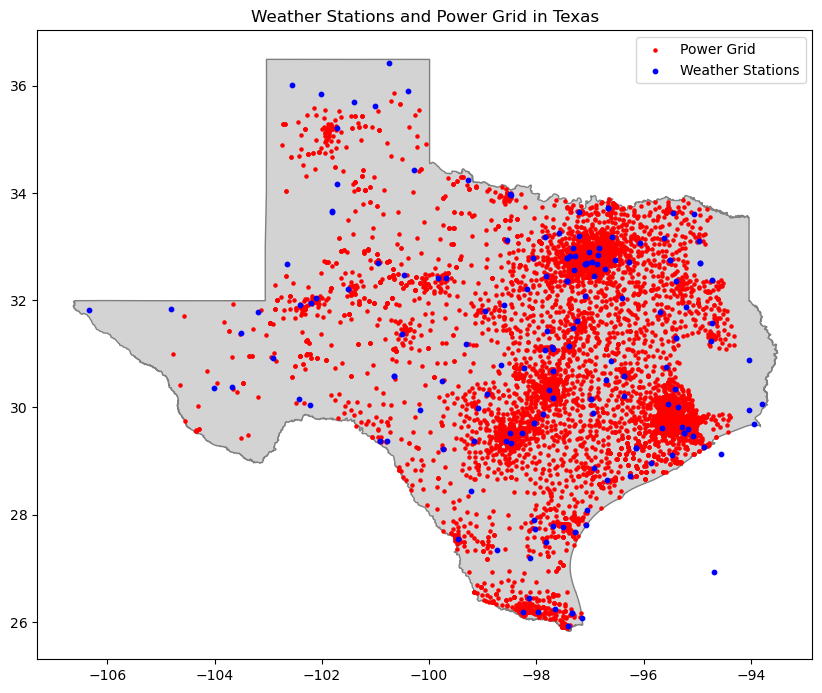

In [17]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the Texas shapefile
texas_shp_file = gpd.read_file("~/Documents/ECE Next/TexasSHP/State.shp")
#tx_weather_stations_df = pd.read_csv("~/Documents/ECE Next/ExtraData/bus_to_weather_connections.csv")

# Convert weather stations and buses DataFrames into geopandas GeoDataFrames
weather_gdf = gpd.GeoDataFrame(tx_weather_stations_df, geometry=gpd.points_from_xy(tx_weather_stations_df['Longitude'], tx_weather_stations_df['Latitude']))
power_grid_gdf = gpd.GeoDataFrame(buses_df, geometry=gpd.points_from_xy(buses_df['Substation Longitude'], buses_df['Substation Latitude']))

fig, ax = plt.subplots(figsize=(10, 10))
texas_shp_file.plot(ax=ax, color='lightgray', edgecolor='grey')
power_grid_gdf.plot(ax=ax, color='red', markersize=5, label='Power Grid')
weather_gdf.plot(ax=ax, color='blue', markersize=10, label='Weather Stations')

ax.set_title("Weather Stations and Power Grid in Texas")
plt.legend()
plt.show()

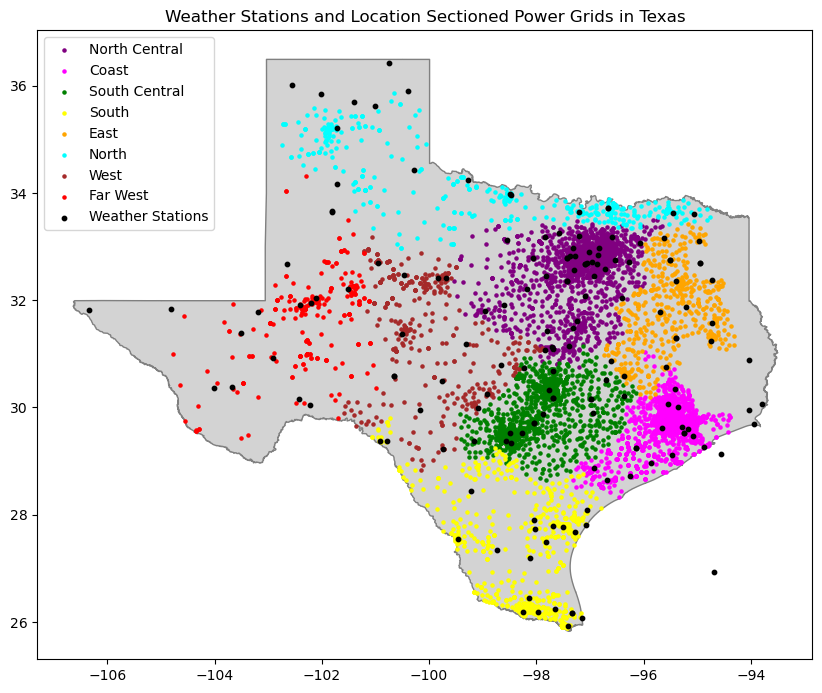

In [24]:
# Define colors for each area
area_colors = {
    'North Central': 'purple',
    'Coast': 'magenta',
    'South Central': 'green',
    'South': 'yellow',
    'East': 'orange',
    'North': 'cyan',
    'West': 'brown',
    'Far West': 'red'
}

# Load the Texas shapefile
texas_shp_file = gpd.read_file("~/Documents/ECE Next/TexasSHP/State.shp")

# Convert weather stations and buses DataFrames into geopandas GeoDataFrames
weather_gdf = gpd.GeoDataFrame(tx_weather_stations_df, geometry=gpd.points_from_xy(tx_weather_stations_df['Longitude'], tx_weather_stations_df['Latitude']))
power_grid_gdf = gpd.GeoDataFrame(buses_df, geometry=gpd.points_from_xy(buses_df['Substation Longitude'], buses_df['Substation Latitude']))

fig, ax = plt.subplots(figsize=(10, 10))
texas_shp_file.plot(ax=ax, color='lightgrey', edgecolor='grey')

# Iterate over each area and plot the corresponding buses
for area, color in area_colors.items():
    area_buses = power_grid_gdf[power_grid_gdf['Area Name'] == area]
    area_buses.plot(ax=ax, color=color, markersize=5, label=area)

weather_gdf.plot(ax=ax, color='black', markersize=10, label='Weather Stations')

ax.set_title("Weather Stations and Location Sectioned Power Grids in Texas")
plt.legend()
plt.show()


After looking at the map/graph visualizations, we can see that there are a few weather stations that seem to not really contribute to our buses due to how far apart they are. The code below will show us which out of the 167 weather stations **do not** contribute to our new dataframe model.

In [16]:
# Create a set of our 167 weather stations
tx_ws_set = set(tx_weather_stations_df['Name'])
assert(len(tx_ws_set) == tx_weather_stations_df.shape[0])
correlations_set = set(correlations_df['Weather Station Name (ICAO)'])

# Find which weather stations are not contributing in our new correlations df
non_contributors = tx_ws_set.difference(correlations_set)
print('Set of non-contributors: \n{}'.format(non_contributors))
print('Number of non-contributors: {}'.format(len(non_contributors)))

Set of non-contributors: 
{'K62H', 'KGYI', 'KLVJ', 'KT31', 'KNFW', 'K3T1', 'K4F4', 'KE29', 'KPYX', 'KBSM', 'K3R5', 'K25T', 'KARM', 'KF18', 'KF54', 'KELP', 'KORG', 'KT56'}
Number of non-contributors: 18


>**NOTE**: There seems to be 18 weather stations that do not contribute to the effects of our power grids. This could possible be very helpful in the future of this research project if we end up deciding to disregard the weather data of those 18 weather stations in order to condense our dataset and perfect our GNN model. 